## 1 Intro

### 1.1 Den klassiska sannolikhetsdefinitionen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles, venn3, venn3_circles

#### Övningsuppgifter

**101**\
Lejla kastar en gång med en vanlig symmetrisk tärning.\
a) Vad är sannolikheten att tärningen visar högst fyra prickar? **Svar:** 4/6\
b) Vad är sannolikheten att tärningen visar minst fem prickar? **Svar:** 2/6\
c) Vilket samband finns det mellan svaren i a) och b)? **Svar:** Summan av sannolikheterna är 1, b) är därför en komplement till a) och viseversa

**102**\
a) Sannolikheten att händelse A inträffar är 1/3. Vad är sannolikheten att A inte inträffar? **Svar:** 2/3.\
b) Vilket samband gäller mellan sannolikheten för en händelse och dess komplement? **Svar:** Tillsammans utgör de den totala antalet av möjliga utfall.

**103**\
a) Azzam singlar slant med två mynt och är intresserad av att bestämma sannolikheten att få exakt en krona. han resonerar på följande sätt. Antalet krona vid kast med två mynt kan anta tre olika värden: 0, 1 eller 2. Bara ett av dessa resulterar i händelsen exakt en krona. Sannolikheten är därför 1/3 enligt den klassiska definitionen. är resonemanget korrekt?\
**Svar:** Resonemanget är EJ korrekt. Ett mynt kan antingen vara 0 eller 1. Utfallen för två mynt är kan då uttryckas som [0, 0] , [1, 0] , [0, 1] , [1, 1]. Därför är sannolikheten 2/4 och inte 1/3.

b) Du kan själv göra ett praktiskt försök så här. Kasta två mynt 100 gånger - eller simulera situationen med hjälp av datorn. Beräkna därefter den relativa frekvensen för händelsen exakt en krona genom att dividera antalet gånger händelsen inträffat i de 100 kasten med antalet kast (100). Kommentera resultatet.

In [38]:
def heads_cointoss(nr_of_coins, times):
    heads = 0
    for i in range(times):

        flip = np.random.randint(low=0, high=2, size=nr_of_coins)

        if np.logical_or(
            np.logical_and(flip[0] == 0, flip[1] == 1),
            np.logical_and(flip[0] == 1, flip[1] == 0),
        ):
            heads += 1
    print(
        f"Exactly one head came up: {heads} times out of {times}. The probability is therefore {heads/times:.0%}."
    )


heads_cointoss(2, 100)

Exactly one head came up: 53 times out of 100. The probability is therefore 53%


c) gör en korrekt beräkning av sannolikheten för exakt en krona vid kast med två mynt. Varför är svaret 1/3 felaktigt?\
**Svar:** Ja, kastet av två mynt kan resultera i antingen 0, 1 eller 2. Men värdet 1 kan förekomma på två sätt:\
När Mynt<sub>1</sub> = 0 och Mynt<sub>2</sub> = 1 eller när Mynt<sub>1</sub> = 1 och Mynt<sub>2</sub> = 0

Antalet möjliga utfall är därför 4, och sannolikheten är 2/4.

**104**\
Linnea kastar samtidigt en blå och en gul symmetrisk tärning.\
a) För varje kast skriver hon upp antalet prickar som de båda tärningarna visar. Detta innebär 36 möjliga utfall. Vilka är dessa?\
**Svar:**

In [55]:
yellow = [1, 2, 3, 4, 5, 6]
blue = [1, 2, 3, 4, 5, 6]
outcomes = []
for i in yellow:
    for j in blue:
        outcomes.append([i, j])
print(*outcomes, "\nTotal outcomes: ", len(outcomes))

[1, 1] [1, 2] [1, 3] [1, 4] [1, 5] [1, 6] [2, 1] [2, 2] [2, 3] [2, 4] [2, 5] [2, 6] [3, 1] [3, 2] [3, 3] [3, 4] [3, 5] [3, 6] [4, 1] [4, 2] [4, 3] [4, 4] [4, 5] [4, 6] [5, 1] [5, 2] [5, 3] [5, 4] [5, 5] [5, 6] [6, 1] [6, 2] [6, 3] [6, 4] [6, 5] [6, 6] 
Total outcomes:  36


b) Linnea adderar nu antalet prickar som de båda tärningarna visar. Vilka värden kan denna summa anta?\
**Svar:**

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


C:\Users\Ally\AppData\Local\Temp\ipykernel_15460\120554943.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'size':10})


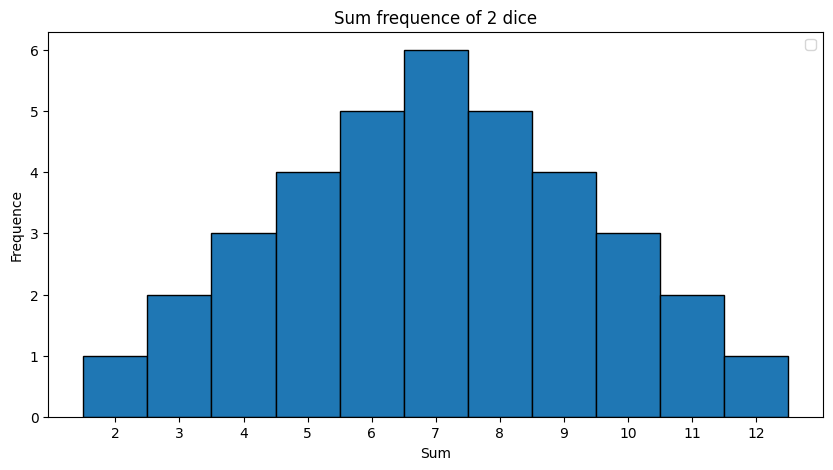

In [156]:
outcomes_sum = []
for result in outcomes:
    outcomes_sum.append(result[0] + result[1])

print(set(outcomes_sum))
plt.figure(figsize=(10, 5))
plt.hist(outcomes_sum, bins=np.arange(2, 14) - 0.5, edgecolor="black")
plt.xticks(np.arange(2, 13))
plt.xlabel("Sum")
plt.ylabel("Frequence")
plt.title("Sum frequence of 2 dice")

c) Beräkna sannolikheten att summan av antalet prickar är fem.\
**Svar:** \
$\begin{aligned}
\frac{4}{36} = \frac{1}{9}
\end{aligned}
$\
d) Beräkna sannolikheten att summan av antalet prickar är högst fyra.\
**Svar:**\
$\begin{aligned}\frac{1+2+3}{36} = \frac{6}{36} = \frac{1}{6}\end{aligned}$\
e) Beräkna sannolikheten att summan av antalet prickar är minst fem.\
**Svar:**\
$\begin{aligned}1 - \frac{1}{6} = \frac{5}{6}\end{aligned}$\
f) Vilket samband finns det mellan svaren i d) och e)?\
**Svar:** d) och e) är komplementhändelser till varandra och tillsammans är antalet möjliga utfall.

### 1.4 Odds

#### Övningsuppgifter

**106**\
I den officiella statistiken redovisas antalet födda pojkar per 1000 födda flickor på det här sättet för några år i början av 2010-talet.
|År|2010|2011|2012|2013|2014|
|:---|---|---|---|---|---|
|Antal pojkar|1056|1048|1058|1061|1059|

Gör en uppskattning av sannolikheten för pojkfödsel.

**Svar:**\
$\begin{aligned}
pojkfödsel& = 1056 + 1048 + 1058 + 1061 + 1059 \\
&= 5282\\
sammanlagd& = 10282\\
\\
\frac{5282}{10282}& \approx 0.514 = 51\%
\end{aligned}$

**107**\
Sannolikheten för en händelse är 0.25. Ange oddset för händelsen.\
**Odds:**
$\begin{aligned}
O(A)=\frac{Pr(A)}{Pr(\overline{A})}=\frac{Pr(A)}{1-Pr(A)}
\end{aligned}$

**Svar:**
$\begin{aligned}
\frac{0.25}{1-0.25}=\frac{0.25}{0.75}=1:3
\end{aligned}$

### 1.5 Mängdlära

#### Övningsuppgifter

**109**\
Följande mängder är givna:\
$ S =\left\{1,2,3,4,5,6,7,8,9\right\} \\ A =\left\{2,4,6,8\right\} \quad B =\left\{1,2,3,4,8,9\right\}$

Ange elementen i mängderna:\
$ a) A\cap B \quad\quad b) A\cup B \quad\quad c) A\cap\overline{B} \quad\quad d) \overline{A}\cap B\\
e) \overline{A}\cap\overline{B} \quad\quad f) \overline{A\cap B} \quad\quad g) (A\cap\overline{B})\cup(\overline{A}\cap B)$

Beskriv med ord de olika mängderna.

**Svar:**\
a) A snitt B: Element som finns i båda mängderna.\
= $\left\{2,4,8\right\}$\
b) A union B: Element som finns i en av mängderna.\
= $\left\{1,2,3,4,6,8,9\right\}$\
c) A snitt B-komplement: Element som finns i A och B-komplement. = Finns i A men inte B.\
$\begin{aligned}\overline{B}&=\left\{5,6,7\right\} \\
A\cap\overline{B} &= \left\{6\right\}\end{aligned}$\
d) A-komplement snitt B: Element som finns i A-komplement och B. = Finns inte i A men i B.\
$\begin{aligned}
\overline{A} &= \left\{1,3,5,7,9\right\}\\
\overline{A}\cap B &= \left\{1,3,9\right\}\end{aligned}$\
e) A-komplement snitt B-komplement: Element som finns i A-komplement och B-komplement. = Finns inte i A eller B.\
= $\left\{5,7\right\}$\
f) (A snitt B)-komplement: Komplementmängden till $A\cup B$\
=$\left\{5,7\right\}$\
g) Union av c) och d)\
=$\left\{1,3,6,9\right\}$


**110**\
I en tillverkningsprocess är A mängden enheter fel a och B mängden enheter med fel b.\
Ange uttryck för mängden:

a) enheter med båda felen\
b) enheter med minst ett av felen\
c) enheter utan fel\
d) enheter utan fel a\
e) enheter med enbart fel a\
f) enheter med exakt ett av de två felen\
Rita Venndiagram och ange i dessa de olika mängderna.

**Svar:**\
$\begin{aligned}
&a) A\cap B \quad\quad &b) A \cup B \quad\quad &c) \overline{A}\cap\overline{B}\\
&d) \overline{A} \quad\quad &e) A \cap \overline{B} \quad\quad &f) (A\cap\overline{B})\cup(\overline{A}\cap B)
\end{aligned}$

### 1.6 Kombinatorik

#### Övningsuppgifter

**115**\
I kvällskursen deltar 23 personer: 18 kvinnor och 5 män. Nu är det dags att välja kursombud. På hur många sätt kan man välja två personer om den först valda ska vara kursombud och den andra suppleant.\
**Svar:** 23 * 22 = 506

**116**\
Hur många fyrsiffriga tal (0 som första siffra räknas inte) kan man bilda av de tio siffrorna 0,1..9 om samma siffra:\
a) får förekomma flera gånger\
**Svar:**
|plats|1000|100|10|1|
|---|---|---|---|---|
|siffror|9|10|10|10|

$9*10*10*10=9000$

b) inte får förekomma flera gånger\
**Svar:**
|plats|1000|100|10|1|
|---|---|---|---|---|
|siffror|9|9|8|7|

$9*9*8*7=4536$

In [4]:
9 * 9 * 8 * 7

4536

**117**\
Tio personer har sökt tjänsten som kyrkokamrer. Inför beslutet i kyrkorådet är det kyrkoherdens uppgift att välja ut tre personer bland de sökande och rangordna dessa. På hur många sätt kan detta ske?\
**Svar:**\
$10*9*8=720$ sätt

**118**\
Tennisklubbens styrelse består av åtta personer. Tre av dessa ska väljas för att planera det stundande femårsjubiléet. På hur många olika sätt kan valet sker?\
**Svar:**\
$\begin{aligned}
\binom{8}{3}=\frac{8!}{3!*(8-3)!} =\frac{8!}{3!* 5!} =\frac{8*7*6}{3*2*1}=56
\end{aligned}$

**119**\
De tre lärarrepresentanterna i institutionsstyrelsen ska väljas bland två professorer och fem lektorer. Vi antar att valet sker slumpmässigt. Vad är sannolikheten att man väljer en professor och två lektorer?\
**Svar:**
||professor|lektor||totalt|
|---|---|---|---|---|
|samtliga|2|5|=|7|
|urvalet|1|2|=|3|

Antal möjliga utfall:\
$\begin{aligned}
\binom{7}{3}=\frac{7!}{3!*(7-3)!} =\frac{7!}{3!* 4!} =\frac{7*6*5}{3*2*1}=35
\end{aligned}$

En professor ska bli vald:\
$\begin{aligned}
\binom{2}{1} = 2
\end{aligned}$


En lektor ska bli vald:\
$\begin{aligned}
\binom{5}{2} = \frac{5!}{2!*(5-2)!} =\frac{5*4}{2*1}=10
\end{aligned}$

**Sannolikheten:**\
$\begin{aligned}
\frac{\binom{2}{1}*\binom{5}{2}}{\binom{7}{3}} = \frac{2*10}{35} =\frac{20}{35}\approx 0.57 = 57\%
\end{aligned}$

**120**\
Hur många olika bokstavsföljder kan man bilda om man använder samtliga bokstäver i ordet JOKKMOKK?\
**Svar:**
|bokstav|antal|
|---|---|
|J|1|
|O|2|
|K|4|
|M|1|

$\begin{aligned}
\frac{8!}{4!*2!*1!*1!}=840\end{aligned}$ bokstavsföljder

**121**\
Michaela har fått ett nytt jobb. Därför har hon bjudit med Mikael på restaurang. Menyn innehåller fjorton rätter av vilka fyra är förrätter,sju varmrätter och tre desserter.
|Förrätt|Varmrätt|Dessert||totalt|
|---|---|---|---|---|
|4|7|3|=|14|


a) Hur många olika sätt kan de komponera? En måltid består av tre rätter, en av varje slag.\
**Svar:**\
$7*4*3=84$ sätt

b) På menyn finns det två kötträtter bland förrätter och fem kötträtter bland varmrätterna. Hur många måltider är det möjligt att komponera om vi anser det omöjligt med kött till både förrätt och varmrätt?\
||Kött|Ej Kött|
|---|---|---|
|Förrätt|2|2|
|Varmrätt|5|2|

**Svar:**\
Omöjliga måltider: $2*5*3 = 30$\
Totala antalet - omöjliga = $84-30=54$ måltider

## 2 Sannolikhetsbegrepp

### 2.1 Slumpförsök, utfallsrum, händelse

Exempel:
|**Slumpförsök**|**Utfallsrum**|
|:---|:---|
|*Kast med tärning*|$\{1,2,3,4,5,6\}$|
|*Köp av lott*|$\{\text{vinst, ej vinst} \}$|

#### Övningsuppgifter

**201**\
Vad innebär begreppen:

a) modell\
**Svar:**\
En modell beskriver ett fenomen med matematiska uttryck.\
En sannolikhetsmodell beskriver fördelningen av resultaten av experimentet.\
'En modell ska återge väsentliga egenskaper utan att kopiera alla detaljer.'\
b) slumpförsök\
**Svar:** Ett försök med oförutsägbar utfall.\
c) utfallsrum\
**Svar:** slumpförsökets alla möjliga utfall.\
d) händelse\
**Svar:** 'En händelse är en delmängd av försökets utfallsrum'\
e) säker händelse\
**Svar:** Består av alla utfall i utfallsrummet.\
f) omöjlig händelse\
**Svar:** Består av inget utfall.

**202**\
Rita venndiagram

**203**\
A,B och C är tre händelser, som kan inträffa i ett slumpförsök. Hur läser man följande uttryck:

$\begin{aligned}
\text{a)}& \quad A\cup B\cup C& \quad\quad \text{b)}& A\cap B\cap C\\
\text{c)}& \quad A\cap \overline{B}\cap\overline{C}& \text{d)}&\overline{A}\cap\overline{B}\cap\overline{C}
\end{aligned}$

**Svar:**\
a) Minst en av händelserna inträffar.\
b) Alla händelser inträffar samtidigt.\
c) Endast A inträffar.\
d) Ingen av händelserna.

**204**\
Försäljningen av en konserv en slumpmässig vald dag beskrivs så här:
|Antal sålda kartonger|0|1|2|3|4|
|-|-|-|-|-|-|
|**Sannolikhet**|0.10|0.20|0.25|0.35|0.10|

a) Undersök om detta är en möjlig uppsättning av elementarsannolikheter, dvs. om vilkoren på sidan 37 är uppfyllda.

**Elementarsannolikhet definition**:\
$\begin{aligned}
\text{1) }& Pr(e_i)\geq 0\\
\text{2) }& \displaystyle\sum_{e_i\in S}Pr(e_i)=1
\end{aligned}$

**Svar:** Det är en möjlig uppsättning.\
$\begin{aligned}
&0.10+0.20+0.25+0.35+0.10=1
\end{aligned}$ 

b) Definiera följande händelser:\
&nbsp;A är händelsen att högst två kartonger säljs en slumpmässig vald dag.\
&nbsp;B är händelsen att två eller tre kartonger säljs en slumpmässig vald dag.\
Beräkna sannolikheterna för händelserna A och B.

Sannolikheten för en händelse:\
$\begin{aligned}
&Pr(H)=\displaystyle\sum_{e_i\in H}Pr(e_i)\\
\end{aligned}$

**Svar:**\
$\begin{aligned}
Pr(A) =&\displaystyle\sum_{e_i\in A}Pr(e_i)\\
=& 0.10+0.20+0.25\\
Pr(A)=&0.55\\
\\
Pr(B)=&\displaystyle\sum_{e_i\in B}Pr(e_i)\\
=& 0.25+0.35\\
Pr(B)=&0.60
\end{aligned}$


**205**\
Ett frågeformulär för marknadsundersökningar innehåller tre frågor. Varje fråga ska besvaras med 'ja' eller 'nej'. i en stor undersökning svarade 60 procent ja på alla tre frågorna, 20 procent svarade ja på två av dem och 10 procent svarafe ja på en fråga. Vad är sannolikheten att en slumpmässigt vald individ svarade ja på:

|Ja svar:|0|1|2|3|
|-|-|-|-|-|
|Sannolikhet(%)|10|10|20|60|


a) Ingen fråga\
**Svar:**\
0.1 eller 10%\
b) minst en fråga\
**Svar:**\
0.9 eller 90%\
c) högst två frågor\
**Svar:**\
0.4 eller 40%

**206**\
I en julklappssäck finns sju hårde och fem mjuka paket. Lilla Mathilda väljer slumpmässigt fem paket, som hon försiktigt klämmer på. Vad är sannolikheten att två av paketen är hårda?\
**Svar:**

|Paket typ:|hård|mjuk||total|
|---|---|---|---|---|
|Antal:|7|5|=|12|
|urval|2|3|=|5|

Antal möjliga utfall:\
$\begin{aligned}
\binom{12}{5} = \frac{12!}{5!*(12-5)!}=\frac{12!}{5!*7!}=\frac{12*11*10*9*8}{5*4*3*2*1} =792 \text{ möjliga utfall}
\end{aligned}$

In [8]:
(12 * 11 * 10 * 9 * 8) / (5 * 4 * 3 * 2 * 1)

792.0

Hårda:\
$\begin{aligned}
\binom{7}{2}=\frac{7!}{2!*(7-2)!}=\frac{7*6}{2*1}=21
\end{aligned}$

Mjuka:\
$\begin{aligned}
\binom{5}{3}=\frac{5!}{3!*(5-3)!}=\frac{5*4*3}{3*2*1}=10
\end{aligned}$

Två hårda paket:\
$\begin{aligned}
\frac{\binom{7}{2}*\binom{5}{3}}{\binom{12}{5}}=\frac{21*10}{792}=\frac{210}{792}\approx{0.265}=27\%
\end{aligned}$

**207**\
I ett kylskåp finns fyra napoleonbakelser, tre knäckbakelser och en petit choux. Pehr väljer på måfå tre bakelser som han förtär till lunch.
|bakelse:|napoleon|knäcke|petit||total|
|---|---|---|---|---|---|
|antal|4|3|1|=|8|

a) Vad är sannolikheten att han äter en bakelse av varje sort?\
**Svar:**
|bakelse:|napoleon|knäcke|petit||total|
|---|---|---|---|---|---|
|antal|4|3|1|=|8|
|urval|1|1|1|=|3|

Antal möjliga utfall:\
$\begin{aligned}
\binom{8}{3}= \frac{8!}{3!*(8-3)!}=\frac{8!}{3!*5!}=\frac{8*7*6}{3*2*1}=56
\end{aligned}$

En av varje sort:\
$\begin{aligned}
&\binom{4}{1}=4 \quad,\quad \binom{3}{1}=3 \quad,\quad \binom{1}{1}=1\\
&4*3*1=12\\
&\frac{12}{56}\approx{0.214}=21\%\text{ att han äter en av varje.}
\end{aligned}$

b) Vad är sannolikheten att han äter tre bakelser av samma sort?\
**Svar:**\
Napoleon:
|bakelse:|napoleon|knäcke|petit||total|
|---|---|---|---|---|---|
|antal|4|3|1|=|8|
|urval|3|0|0|=|3|

$\begin{aligned}
\binom{4}{3} = \frac{4!}{3!*1!}=4 \quad:\quad \frac{4}{56}\end{aligned}$

Knäcke:
|bakelse:|napoleon|knäcke|petit||total|
|---|---|---|---|---|---|
|antal|4|3|1|=|8|
|urval|0|3|0|=|3|

$\begin{aligned}
\binom{3}{3} = 1 \quad:\quad \frac{1}{56}\end{aligned}$

$\begin{aligned}
\frac{4}{56}+\frac{1}{56}=\frac{4+1}{56}\approx{0.089} \approx{0.9}\%\end{aligned}$



**208**\
A och B är två händelser. Vi känner:\
$Pr(A)=0.22 \quad\quad Pr(A\cap B)=0.08 \quad\quad Pr(\overline{A}\cap B)=0.13$\
Bestäm $Pr(B)$ och $Pr(A\cup B)$. (Ledning: Rita Venndiagram)

**Svar:**\
$Pr(B)=0.13+0.08 = 0.21\\ Pr(A\cup B)=0.22+0.13=0.35$


Text(0.5, 1.0, '208 Venndiagram')

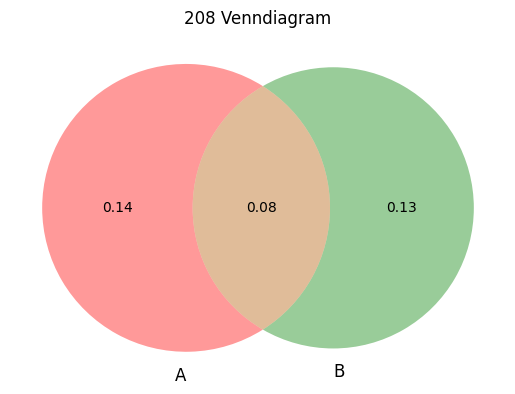

In [19]:
venn2(subsets=(0.14, 0.13, 0.08), set_labels=("A", "B"))
plt.title("208 Venndiagram")

**209**\
Känd information:

|Ja|fråga 1|fråga 2|fråga 1 & 2|
|-|-|-|-|
|procent|67%|52%|40%|

Vad är sannoliketen att den valda personen:\
a) svarat ja på båda frågorna\
**Svar:**\
$A\cap B = 40\%$

b) enbart svarat ja på den första frågan\
**Svar:**\
$A\cup (A\cap B) = 67\%-40\%=27\%$

c) svarat ja på exakt en av frågorna\
**Svar:**\
$(A\cap\overline{B})\cup(\overline{A}\cap B)=27\%+12\%=39\%$

d) svarat ja på högst en av frågorna\
**Svar:**\
$39\%+21\%=60\%$

e) inte svarat ja på någon av frågorna\
**Svar:**\
$100\%-79\%=21\%$

f) svarat ja på minst en av frågorna\
**Svar:**\
$A \cup B = 79\%$

**210**\
Fortsättning på **209**. Rita Venndiagram och beräkna sannolikheterna för följande händelser.

a) $A\cap B$\
**Svar:** Mängden av händelser i A och/eller B

b)$A\cap\overline{B}$\
**Svar:** Mängden av händelser i endast A

c)$(A\cap\overline{B})\cup(\overline{A}\cap B)$\
**Svar:** Mängden av händelser i enbart A och enbart B

d)$A\cup B$\
**Svar:** Mängden av händelser i både A och B

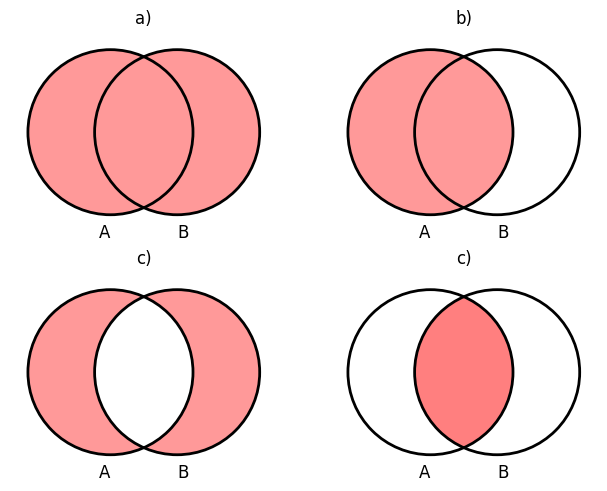

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, layout="constrained")

subset = [1, 1, 1]
labels = ["a)", "b)", "c)", "d)"]


def hide_labels(venn_diagram):
    for idx, sub in enumerate(venn_diagram.subset_labels):
        venn_diagram.subset_labels[idx].set_visible(False)


# Uppgift a)
axs[0][0].set_title(labels[0])
vd = venn2(subsets=subset, ax=axs[0][0], set_colors=["r", "r"])
hide_labels(vd)
c = venn2_circles(subsets=subset, ax=axs[0][0])

# Uppgift b)
axs[0][1].set_title(labels[1])
vd = venn2(subsets=subset, ax=axs[0][1], set_colors=["r", "r"])
hide_labels(vd)
vd.get_patch_by_id("01").set_alpha(0)
c = venn2_circles(subsets=subset, ax=axs[0][1])

# Uppgift c)
axs[1][0].set_title(labels[2])
vd = venn2(subsets=subset, ax=axs[1][0], set_colors=["r", "r"])
hide_labels(vd)
vd.get_patch_by_id("11").set_alpha(0)
c = venn2_circles(subsets=subset, ax=axs[1][0])

# Uppgift d)
axs[1][1].set_title(labels[2])
vd = venn2(subsets=subset, ax=axs[1][1], set_colors=["r", "r"])
hide_labels(vd)
vd.get_patch_by_id("10").set_alpha(0)
vd.get_patch_by_id("01").set_alpha(0)
vd.get_patch_by_id("11").set_alpha(0.5)
c = venn2_circles(subsets=subset, ax=axs[1][1])
plt.show()

**211**\
Soldater:
|Förlorat|öra|öga|båda|
|-|-|-|-|
|procent|25|55|5|

Vad är sannolikheten att en soldat varken förlorat ett öga eller ett öra?

**Svar:**\
$20+5+50=75\%$ har förlorat en kroppsdel\
$100\%-75\%=25\%$ har varken förlorat ett öga eller öra.

**212**\
Adam och Beda äter lunch tillsammans. 12% är båda sena. 

|I tid|Adam|Beda|båda|
|-|-|-|-|
|procent|30||88|

Vad är sannolikheten att enbart Beda kommer i tid?\
**Svar:**\
$88\%-30\%=58\%$

**213**\
Slumpmässigt väljer man en person som deltar i en föreläsning.
|händelse||procent|
|-|-|-|
|A|valda personen är en kvinna|40|
|B|valda personen har skägg|25|

a) $A\cap B$\
**Svar:** Sannolikheten är 0. "A och B är disjunkta"

b) $A\cup B$\
**Svar:** 65%. Händelse i A och/eller B.

c) $\overline{A}\cap\overline{B}$\
**Svar:** 100% - 65% = 35%. Personen är en man utan skägg.


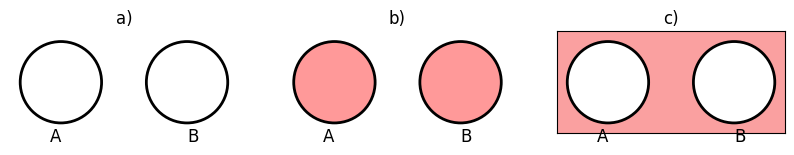

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(10)
fig.set_figheight(4)

subset = [1, 1, 0]
labels = ["a)", "b)", "c)"]


def hide_labels(venn_diagram):
    for idx, sub in enumerate(venn_diagram.subset_labels):
        if venn_diagram.subset_labels[idx]!=None:
            venn_diagram.subset_labels[idx].set_visible(False)


# Uppgift a)
axs[0].set_title(labels[0])
vd = venn2(subsets=subset, ax=axs[0], set_colors=["r", "r"])
vd.get_patch_by_id("01").set_alpha(0)
vd.get_patch_by_id("10").set_alpha(0)
hide_labels(vd)
c = venn2_circles(subsets=subset, ax=axs[0])

# Uppgift b)
axs[1].set_title(labels[1])
vd = venn2(subsets=subset, ax=axs[1], set_colors=["r", "r"])
hide_labels(vd)
c = venn2_circles(subsets=subset, ax=axs[1])

# Uppgift c)
axs[2].set_title(labels[2])
axs[2].set_facecolor('#FAA0A0')
vd = venn2(subsets=subset, ax=axs[2], set_colors=["w", "w"],alpha=1)
hide_labels(vd)
c = venn2_circles(subsets=subset, ax=axs[2])
axs[2].set_axis_on()



plt.show()

**214**\
20% blir arbetslösa. Av de arbetslösa är det 12% som inte kan betala tillbaks skulden.\
Hur stor är andelen?

**Betingad Sannolikhet:**\
*Den betingade sannolikheten för händelsen A under förutsättning att händelsen B har inträffat är*

$Pr(A|B)=\frac{Pr(A\cap B)}{Pr(B)}$


**Svar:**\
$\frac{0.12}{0.2}=0.6=60\%$

**215**\
Smörgåsätare på Sällskapets årsmöte:
|Pålägg|ost|kaviar|båda|
|-|-|-|-|
|procent|45|35|15|

Ost = A\
Kaviar = B

a) Anta att den valda personen har ost på sin smörgås, vad är sannolikheten att kaviar också finns på smörgåsen?\
**Svar:**

$\frac{15}{45+15}=\frac{15}{60}= 0.25=25\%$


b) Anta att den valda personen har kaviar på sin smörgås, vad är sannolikheten att ost också finns på smörgåsen?\
**Svar:**

$\frac{15}{35+15}=\frac{15}{50}=0.3=30\%$


In [96]:
0.25/0.70

0.35714285714285715

**216**\
Bland statistiker har 40% glasögon och 55% skägg. 25% har både glasögon och skägg.

Vad är sannolikheten att personen:\
a) har skägg om han har glasögon\
**Svar:**\
$\frac{25}{40}=\frac{25}{40}=0.625=62.5\%$

b) har både glasögon och skägg om vi vet att han har minst en av dessa egenskaper\
Har minst en av egenskaperna:\
$15+30+25=70\%$

Har både skägg och glasögon:\
$\frac{25}{70}\approx{0.357}\approx{36}\%$

**217**\
I det gamla Egypten förekom en viss sjukdom hos kameler. 10 procent av alla kameler i Egypten hade denna sjukdom. En veterinär vars uppgift var att diagnostisera kameler, ställde med sannolikheten:\
  0.8 diagnosen sjuk, då en kamel var sjuk.\
  0.9 diagnosen frisk, då en kamel var frisk.

Totalt sjuka kameler: 10%\
sjuk kamel med diagnos sjuk: 80%\
frisk kamel med diagnos frisk: 90%


a) Vad var sannolikheten att en kamel fick diagnosen sjuk\
**Lösning:**

$\begin{aligned}
&\text{Sjuka kameler med diagnos sjuk }&= 0.1*0.8=0.08\\
&\text{Friska kameler med diagnos sjuk } &= 0.9*0.1=0.09\end{aligned}$\
$0.1*0.8+0.9*0.1=0.17$\
**Svar:** Sannolikheten är 17%

b) Vad var sannolikheten att en kamel med diagnosen sjuk verkligen var sjuk\
**Lösning:**

$\begin{aligned}
\frac{0.08}{0.17}\approx{0.471}
\end{aligned}$\
**Svar:** Sannolikheten är 47%

c) Vad var sannolikheten för feldiagnos\
**Svar:**\
Sjuk kamel med diagnos frisk: $0.1*0.2$\
Frisk kamel med diagnos sjuk: $0.9*0.1$

$\begin{aligned}
0.1*0.2+0.9*0.1=0.11
\end{aligned}$\
Sannolikheten är 11%

d) En annan veterinär ställde alltid diagnosen frisk. Därmed minskades risken för feldiagnos, enligt denne veterinär. Är detta påstående korrekt?\
**Svar:**\
Frisk kamel med diagnos frisk: $0.9*0.9$\
Sjuk kamel med diagnos frisk: $0.1*0.2$

$\begin{aligned}
&0.9*0.9+0.1*0.2=0.83=\text{ 83\% fick diagnos frisk}\\
&\frac{0.81}{0.83}\approx{0.976}
\end{aligned}$


Påståendet stämmer:\
98% av kameler med diagnos frisk var faktiskt friska,\
47% av kameler med diagnos sjuk var faktiskt sjuka.

**218**\
A och B är två händelser.\
$Pr(A\cup B)=0.88 \quad\quad Pr(A\cap \overline{B})=0.18 \quad\quad Pr(\overline{A}\cap B)=0.28$

Är händelserna A och B oberoende? Undersök om $Pr(A\cap B) = Pr(A)*Pr(B)$ och besvara frågan.\
**Lösning:**

$\begin{aligned}
Pr(A\cup B)&= Pr(A\cap \overline{B})+ Pr(\overline{A}\cap B)+Pr(A\cap B)\\
0.88&= 0.18+0.28+Pr(A\cap B)\\
Pr(A\cap B) &= 0.88-0.46\\
Pr(A\cap B) &= 0.42\\
\\
Pr(A) &=0.18+0.42 = 0.60\\
Pr(B) &=0.28+0.42 = 0.70\\
\\
Pr(A\cap B) &= Pr(A)*Pr(B)\\
0.42 &= 0.6*0.7
\end{aligned}$

**Svar:** Händelserna A och B är oberoende.

**219**\


**225**
Approximativ sannolikhet:\

a)\
$\begin{aligned}
&\binom{100}{3}=161700\\
&\binom{20}{3}=1140\\
&\frac{\binom{20}{1}*\binom{80}{2}}{\binom{100}{3}}=\frac{20*3160}{161700}\approx{0.391}\end{aligned}$

b)

$\begin{aligned}
\binom{3}{1}*0.2*0.8^2\approx{0.384}
\end{aligned}$

In [114]:
3 * 0.2 * 0.8 * 0.8

0.3840000000000001

## 3 Diskret Slumpvariabel

### Inför 29/10-24 lektion:
Denna frågan kommer ni diskutera i grupperna:\
Antag att du ser följande notation: P(X = x) = 0.4 . Hur tolkar du det rent generellt?

**Uppgifter:**
* 304
* 306
* 307, 309, 311, 313
* 314
* 317
* 318


**304**\
Antalet tryckfel på en slumpmässigt vald sida i en tjock lärobok i statistik dataanalys har följande sannolikhetsfördelning:
|Antal tryckfel, *x*|0|1|2|
|-|-|-|-|
|**Sannolikhet,** *p(x)*|0.90|0.09|0.01|

Bestäm väntevärdet och variansen för antelet tryckfel på en slumpmässigt vald sida.\
**Svar:**

$\begin{aligned}
&\text{Väntevärdet:}\\
&E(X)=\mu={\large\Sigma x*p(x)}=0*0.9+1*0.09+2*0.01=0.11\\
\\
&\text{Variansen:}\\
&Var(X)={\large\Sigma x^2*p(x)-\mu^2}\\
&Var(X) =(0^2*0.9+1^2*0.09+2^2*0.01)-0.11^2 = 0.13-0.0121 = 0.1179
\end{aligned}$

**306**\
I en reseguide anges att dyngsmedeltemperaturen en viss månad har medelvärdet $\mu = 12.0^\circ C$ och standardavvikelsen $\sigma = 3.5^\circ C$. Vad är medelvärdet och standardavvikelsen uttryckt i Fahrenheit? ($F=1.8*C+32$)\
**Svar:**

$\begin{aligned}
&\text{Medelvärdet:}\\
&\mu_F=1.8*12+32 =21.6+32=53.6\\
\\
&\text{Standardavvikelsen:}\\
&\sigma_F=1.8*3.5+32 =6.3+32=38.3
\end{aligned}$

**307**\
Slumpvariabeln X är $Bi(n=12;\pi=0.4)$ Bestäm med hjälp av tabell 1:

$\begin{aligned}
\text{a) }&Pr(X\leq 6)\\
&0.8418\\
\text{b) }&Pr(X<6)\\
&0.6652\\
\text{c) }&Pr(X= 6)\\
&0.8418-0.6652=0.1765\\
\text{d) }&Pr(X>6)&\\
&1-0.8418=0.1582&
\end{aligned}$


**309**\
En undersökning visar att en tredjedel av alla barn i förskoleåldern får huvudlöss. Slumpmässigt väljer vi tre barn.\
Vad är sannolikheten att exakt två av barnen får huvudlöss?

**Svar:**

$\begin{aligned}
&\pi=\frac{1}{3} \quad\quad, n=3\\
&Pr(X=2)=\binom{3}{2}*\left(\frac{1}{3}\right)^2*\left(\frac{2}{3}\right)=\dfrac{6}{27} \approx{0.22}
\end{aligned}$


**311**\
Om en säljare ringer till en tänkbar kund är sannolikheten 40 procent att detta telefonsamtal inom en månad leder till en affärskontakt. Låt oss anta att säljaren har sexton sådana telefonsamtal och att X av detta leder till en affärskontakt.

a) Vad är sannolikheten att ***mindre än*** hälften av dessa telefonsamtal leder till en affärskontakt?\
b) Vad är sannolikheten att ***mer än*** hälften av dessa telefonsamtal leder till en affärskontakt?

X är $Bi(n=16;\pi=40)$

a) $Pr(X<8)=0.7161$\
b) $Pr(X>8)=1-0.8577\approx{0.1423}$

**313**\
30 procent av anmälda kommer inte på provet\
20 studenter har anmält sig\
Lokalen har 17 platser\
Vad är sannolikheten att lokalen inte kommer räcka till?

$\pi=0.7 \quad,\quad n=20$\
$Pr(X=17)$\
**Svar:**

$\begin{aligned}
Pr(X\geq 17)&=1-Pr(X=17)\\
&=1-0.9645\\
&\boxed{\approx{0.0355}}\end{aligned}$


**314**\
Slumpvariabeln X är $Po(\mu=2.0)$ Bestäm med hjälp av tabell 2:

$\begin{aligned}
\text{a) }&Pr(X\leq 4)\\
&0.9473\\
\text{b) }&Pr(X<4)\\
&0.8571\\
\text{c) }&Pr(X= 4)\\
&Pr(X\leq 4)-Pr(X<4)\\
&0.9473-0.8571=0.0902\\
\text{d) }&Pr(X>4)&\\
&1-0.9473\approx{0.0527}&
\end{aligned}$

**317**\
40 procent av väljare sympatiserar med det borgerliga blocket.

**Svar:**\
a) Låt X vara antalet personer man väljer. Bestäm sannolikhetsfördelningen för denna slumpvariabel\
$\begin{aligned}
&Pr(X=x)=(x-\pi)^{x-1}*\pi\\
&Pr(X=x)=0.6^{x-1}*0.4
\end{aligned}$

b) Vad är sannolikheten att man måste välja exakt tre personer?\
$\begin{aligned}
Pr(X=3)&=0.6^{(3-1)}*0.4\\
&=0.36*0.4\\
&=0.144
\end{aligned}$

c) Vad är väntevärdet för slumpvariabeln X?\
$\begin{aligned}
E(X)&=\dfrac{1}{\pi}=\dfrac{1}{0.4}=2.5
\end{aligned}$

In [74]:
1/0.4

2.5

**318**\

## 4 Tvådimensionell slumpvariabel

### **401**
Tabellen visar simultana sannolikhetsfördelningen *p(x, y)* för de båda slumpvariablerna X och Y.
|y\x|0|1|2|
|-|-|-|-|
|0|0.40|0.20|0.07|
|1|0.15|0.09|0.02|
|2|0.04|0.02|0.01|



Bestäm

a) p(x) och p(y)
||0|1|2|p(y)|
|-|-|-|-|-|
|0|0.40|0.20|0.07|0.67|
|1|0.15|0.09|0.02|0.26|
|2|0.04|0.02|0.01|0.07|
|p(x)|0.59|0.31|0.10|1|

\
\
$\begin{aligned}
b) Var(Y)&, Väntevärdet\\
 Var(Y)&=E(Y^2)-[E(Y)^2]= \Sigma y^2*p(y)- \mu^2\\
 E(Y)&=0*0.67+1*0.26+2*0.07\\
 &=0.4\\
 E(Y)^2&=\mu^2=0.4^2\\
 \\
 E(Y^2)&=0^2*0.67+1^2*0.26+2^2*0.07\\
 &=0.54\\
 \\
 Var(Y)&=0.54-0.4^2\\
 &=0.38
\end{aligned}$

$\begin{aligned}
c) Pr(X+Y\leq 2)& \text{ summera sannolikheterna i tabellen om summan av X+Y högst blir 2}\\
&=0.4+0.2+0.07+0.15+0.04+0.09\\
Pr(X+Y\leq 2)&=0.95
\end{aligned}$

\
\
$d) p(x|Y = 1) \text{ p(x) när raden där Y=1}$

$\begin{aligned}
&Pr(A|B)=\dfrac{Pr(A\cap B)}{Pr(B)}=P(X=x|Y=1)=\dfrac{P(X=x,Y=1)}{P(Y=1)}
\end{aligned}$
|1|0.15|0.09|0.02|0.26|
|-|-|-|-|-|
|p(x\|Y=1)|0.15/0.26|0.09/0.26|0.02/0.26|0.26/0.26=1|

\
\
$\begin{aligned}
e) E(X|Y &= 1)\\
E(X|Y&=1) = \Sigma x*p(x|Y=1)\\
&=\left(0*\frac{0.15}{0.26}\right)+\left(1*\frac{0.09}{0.26}\right)+\left(2*\frac{0.02}{0.26}\right)\\
&=0.5
\end{aligned}$

\
\
$\begin{aligned}
f) Var(X|Y = 1)&\\
E(X|Y=1)&=0.5\\
E(X^2|Y=1)&=\left(0^2*\frac{0.15}{0.26}\right)+\left(1^2*\frac{0.09}{0.26}\right)+\left(2^2*\frac{0.02}{0.26}\right)\\
&=0.65\\
Var(X|Y=1)&=0.65-0.5^2\\
&=0.4
\end{aligned}$

\
\
g) Är X och Y oberoende slumpvariabler?\
Slumpvariablerna är oberoende om produkten av p(x) och p(y) blir p(x,y).\
p(x) i detta fall:\
$\begin{aligned}
&p(x_1)=0.59 \quad, p(x_2)=0.31 \quad, p(x_3)=0.10\\
&p(y_1)=0.67 \quad, p(y_2)=0.26 \quad, p(y_3)=0.07\\
\\
&p(x,y)=p(x)*p(y)\\
&0.4\not= 0.59*0.67\\
&0.09\not=0.31*0.26
\end{aligned}$\
Nej, de är beroende.

In [5]:
print((0.26)+(4*0.07))

print((0.09/0.26)+(4*(0.02/0.26)))
print((0.65)-0.5**2)
0.31*0.26

0.54
0.6538461538461539
0.4


0.0806

### **402**
En person äger två butiker. Tabellen visar efterfrågan (x = antal lådor) av en viss vara i en av dessa butiker en slumpmässigt vald dag:

**Butik A**
|x|0|1|2|3|
|-|-|-|-|-|
|p(x)|0.15|0.25|0.35|0.25|

För den andra butiken beskrivs efterfrågan (y = antal lådor) av samma vara så här:

**Butik B**
|y|0|1|2|3|
|-|-|-|-|-|
|p(y)|0.10|0.40|0.30|0.20|

Vi antar att efterfrågan i de två butikerna är oberoende variabler.\
a) Bestäm den simultana sannolikhetsfördelningen *p*(*x, y*).\
b) Bestäm den betingade fördelningen *p*(*x* | Y = 1). Hur vill du kommentera resultatet?

**a) Svar:**\
$\begin{aligned}
p(x,y)=p(x)*p(y)
\end{aligned}$

|x,y|0|1|2|3|p(y)|
|:-:|:-:|:-:|:-:|:-:|:-:|
|**0**|0.015|0.025|0.035|0.025|**0.10**|
|**1**|0.06|0.1|0.14|0.1|**0.40**|
|**2**|0.045|0.075|0.105|0.075|**0.30**|
|**3**|0.03|0.05|0.07|0.05|**0.20**|
|**p(x)**|**0.15**|**0.25**|**0.35**|**0.25**|**1**|

In [24]:
x_arr = np.array([0.15, 0.25, 0.35, 0.25])
y_arr = np.array([0.10, 0.40, 0.30, 0.20])
xy=[]

for y in y_arr:
    for x in x_arr:
        xy.append(x*y)
        
xy=np.array(xy).reshape([4,4])
print(xy)


[[0.015 0.025 0.035 0.025]
 [0.06  0.1   0.14  0.1  ]
 [0.045 0.075 0.105 0.075]
 [0.03  0.05  0.07  0.05 ]]


**b) Svar:**\
$\begin{aligned}
&p(x|Y=1)= [0.06/0.40, 0.1/0.40, 0.14/0.40, 0.1/0.40]\\
&p(x|Y=1)= [0.15, 0.25, 0.35, 0.25]\\
\end{aligned}$

p(x|Y = 1) är alltså p(x) eftersom variablerna är oberoende.\
$p(x|Y=1)=p(x)$


### **403**
Tabellen visar den simultana sannolihetsfördelningen p(x,y) för variablerna X och Y.
|x\y|0|1|*p(y)*|
|---|---|---|---|
|**2**|1/4|0|1/4|
|**3**|0|2/4|2/4|
|**4**|1/4|0|1/4|
|*p(x)*|2/4|2/4|1|

a) Bestäm kovariansen mellan X och Y.\
b) Är variablerna oberoende?

**a) Svar**

***Beräkningsformel för kovariansen***\
$\boxed{\begin{aligned}
&Cov(X,Y)=E(X*Y)-E(X)*E(Y)\\
&E(X*Y)=\sum \large x*y*p(x,y)\\
&E(X)=\sum\large x*p(x)\\
&E(Y)=\sum\large y*p(y)\\
\end{aligned}}$


$\begin{aligned}
E(X)&=0*\frac{2}{4}+1*\frac{2}{4}\quad\quad& E(Y)&=2*\frac{1}{4}+3*\frac{2}{4}+4*\frac{1}{4}\\
E(X)&=\frac{2}{4} & E(Y)&=\frac{2}{4}+\frac{6}{4}+\frac{4}{4}\\
&&E(Y)&=\frac{12}{4}\\
E(X)&=\boxed{0.5}&E(Y)&=\boxed{3}
\end{aligned}$



$\begin{aligned}
E(X*Y)=&\left(0*2*\frac{1}{4}\right)+\left(1*2*0\right)+\\
&\left(0*3*0\right)+\left(1*3*\frac{2}{4}\right)+\\
&\left(0*4*\frac{1}{4}\right)+\left(1*4*0\right)\\
=&\left(1*3*\frac{2}{4}\right)=\frac{6}{4}\\
E(X*Y)=&\boxed{1.5}
\end{aligned}$

$\begin{aligned}
Cov(X,Y)&=\\
&=1.5-(0.5*3)\\
&=1.5-1.5\\
Cov(X,Y)&=0
\end{aligned}$

**b) Svar:**\
Variablerna är okorrelerade men inte oberoende.\
p(1,3)=2/4 inte är produkten av p($x_1$)=2/4 och p($y_3$)=2/4

### **407**
Antal tryckfel på en slumpmässigt vald sida i en tjock lärobok i statistisk dataanalys har följande sannolikhetsfördelning:
|Antal tryckfel, x|0|1|2|
|-|-|-|-|
|**Sannolikhet,p(x)**|0.90|0.09|0.01|

Bestäm väntevärdet och variansen för antalet tryckfel på två slumpmässigt valda sidor.

$\boxed{\begin{aligned}
&\text{Formler}\\
&Väntevärdet &\quad &Varians\\
&E(X)=\sum\large x*p(x)&\quad &Var(X)=E(X^2)-E(X)^2\\
\end{aligned}}$

**Svar:**\
$\begin{aligned}
E(X)&=\sum\large x*p(x)&E(X^2)&=\sum\large x^2*p(x)\\
&=(0*0.90)+(1*0.09)+(2*0.01)&&=(0^2*0.90)+(1^2*0.09)+(2^2*0.01)\\
&=0.09+0.02&&=0.09*0.04\\
E(X)&=\boxed{0.11}&E(X^2)&=\boxed{0.13}
\end{aligned}$

$\begin{aligned}
Var(X)&=E(X^2)-E(X)^2\\
&=0.13-0.11^2\\
&=0.13-0.0121\\
Var(X)&=\boxed{0.1179}
\end{aligned}$

Variansen och väntevärdet:\
på en slumpmässigt vald sida är 0.11 och 0.1179.\
på två slumpmässigt valda sidor är därför 0.22 och 0.2358.

### **409**
För en viss vara gäller antalet felaktiga enheter i en slumpmässigt vald förpackning är en slumpvariabel med väntevärdet fem och standardavvikelsen två. En låda innehåller tolv förpackningar. Beräkna väntevärdet och standardavvikelsen för antalet felaktiga enheter i en slumpmässigt vald låda. Ange de förutsättningar dina beräkningar bygger på.

Känd info:\
För en förpackning:\
Väntevärde $\mu$= 5, Standardavvikelse $\sigma$ = 2\
En låda = 12 förpackningar

**Svar:**\
Väntevärdet för 12 förpackningar\
$\begin{aligned}
E(X) &= E(X_1+X_2+X_3+...X_n)\\
&=12*5\\
&=\boxed{60}
\end{aligned}$

Standardavvikelsen för 12 förpackningar\
$\begin{aligned}
Var(X) &= Var(X_1+X_2+X_3+...X_n)\\
Var(X)&=\sigma^2=4\\
&=12*4\\
Var(X)&=48\\
\sigma&=\sqrt{48}\\
\sigma&=\boxed{6.9}
\end{aligned}$

Jag antar att antalet felaktiga enheter är oberoende av varandra.

### **410**
En försöksserie består av tre oberoende försök. Sannolikheten att ett försök lyckas första gången är 1/2.

## 5 Normalfördelning

| **Header** | **Data** |
|---|---|
| Row 1 | Data 1 | 
| Row 2 | Data 2 |
| Row 3 | Data 3 |